In [644]:
import pandas as pd
import numpy as np
import json
import ast
import itertools as it
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [11]:
# Quantidade de itens
len(train), len(test)

(18815, 6272)

In [687]:
def createFeatures(data):
    df = pd.DataFrame()
    df['id'] = data['id']

    if('target' in data):
        df['target'] = data['target']

    keyDownItems = data['keydown']
    keyUpItems = data['keyup']
    
#    keyDownUpDiff = []
    
    totalTime = []

    intervalSum = []
    intervalMedian = []
    intervalAverage = []
    intervalMean = []
    intervalDeviation = []
    intervalVariance = []
    
    pressedSum = []
    pressedMedian = []
    pressedAverage = []
    pressedMean = []
    pressedDeviation = []
    pressedVariance = []
    
    pressedIntervalSum = []
    pressedIntervalMedian = []
    pressedIntervalAverage = []
    pressedIntervalMean = []
    pressedIntervalDeviation = []
    pressedIntervalVariance = []

    keyDownTotalSum = []
    keyDownTotalMedian = []
    keyDownTotalAverage = []
    keyDownTotalMean = []
    keyDownTotalDeviation = []
    keyDownTotalVariance = []

    keyUpTotalSum = []
    keyUpTotalMedian = []
    keyUpTotalAverage = []
    keyUpTotalMean = []
    keyUpTotalDeviation = []
    keyUpTotalVariance = []
    
    for keyDownItem, keyUpItem in it.zip_longest(keyDownItems, keyUpItems, fillvalue=0):
        
        keyDowns = ast.literal_eval(keyDownItem)
        keyUps = ast.literal_eval(keyUpItem)
        
        # Calcula diferença entre quantidade de keydowns e keyups
#        if len(keyDowns) != len(keyUps):
#            keyDownUpDiff.append(1)
#        else:
#            keyDownUpDiff.append(0)
        
        keyPairs = [keyPair for keyPair in it.zip_longest(keyDowns, keyUps, fillvalue=-1)]
        intervals = []
        pressed = []
#        pressedInterval = []
        for i in range(len(keyPairs)):
            # Calcula os intervalos
            if i+1 < len(keyPairs):
                if keyPairs[i][1] == -1 or keyPairs[i+1][0] == -1:
                    intervals.append(0)
                else:
                    intervals.append(keyPairs[i+1][0]['tick'] - keyPairs[i][1]['tick'])
            # Calcula os pressionamentos
            if keyPairs[i][1] == -1 or keyPairs[i][0] == -1:
                pressed.append(0)
            else:
                pressed.append(keyPairs[i][1]['tick'] - keyPairs[i][0]['tick'])
            # Calcula pressionamento + intervalo entre teclas
#            if i == 0:
#                if keyPairs[i][1] == -1:
#                    pressedInterval.append(0)
#                else:
#                    pressedInterval.append(keyPairs[i][1]['tick'])
#            else:
#                if keyPairs[i][1] == -1 or keyPairs[i-1][1] == -1:
#                    pressedInterval.append(0)
#                else:
#                    pressedInterval.append(keyPairs[i][1]['tick'] - keyPairs[i-1][1]['tick'])
        
        intervalSum.append(np.sum(intervals))
        intervalMedian.append(np.median(intervals))
        intervalAverage.append(np.average(intervals))
        intervalMean.append(np.mean(intervals))
        intervalDeviation.append(np.std(intervals))
        intervalVariance.append(np.var(intervals))
        
        pressedSum.append(np.sum(pressed))
        pressedMedian.append(np.median(pressed))
        pressedAverage.append(np.average(pressed))
        pressedMean.append(np.mean(pressed))
        pressedDeviation.append(np.std(pressed))
        pressedVariance.append(np.var(pressed))
        
#        pressedIntervalSum.append(np.sum(pressedInterval))
#        pressedIntervalMedian.append(np.sum(pressedInterval))
#        pressedIntervalAverage.append(np.sum(pressedInterval))
#        pressedIntervalMean.append(np.sum(pressedInterval))
#        pressedIntervalDeviation.append(np.sum(pressedInterval))
#        pressedIntervalVariance.append(np.sum(pressedInterval))
        
        #Calcula tempo total de digitação
        if keyPairs[-1][1] == -1:
            totalTime.append(0)
        else:
            totalTime.append(keyPairs[-1][1]['tick'])
        
        # Calcula os keydowns
        keyDownTicks = [keyDownTick['tick'] for keyDownTick in keyDowns]
        keyDownTotalSum.append(np.sum(keyDownTicks))
        keyDownTotalMedian.append(np.median(keyDownTicks))
        keyDownTotalAverage.append(np.average(keyDownTicks))
        keyDownTotalMean.append(np.mean(keyDownTicks))
        keyDownTotalDeviation.append(np.std(keyDownTicks))
        keyDownTotalVariance.append(np.var(keyDownTicks))
        
        # Calcula os keyups
        keyUpTicks = [keyUpTick['tick'] for keyUpTick in keyUps]
        keyUpTotalSum.append(np.sum(keyUpTicks))
        keyUpTotalMedian.append(np.median(keyUpTicks))
        keyUpTotalAverage.append(np.average(keyUpTicks))
        keyUpTotalMean.append(np.mean(keyUpTicks))
        keyUpTotalDeviation.append(np.std(keyUpTicks))
        keyUpTotalVariance.append(np.var(keyUpTicks))
            
#    df['keyDownUpDiff'] = keyDownUpDiff
    
#    df['crazy1'] = np.divide(totalTime, keyDownTotalSum)
#    df['crazy2'] = np.divide(totalTime, keyUpTotalSum)
#    df['crazy3'] = np.divide(totalTime, intervalMean)
#    df['crazy4'] = np.divide(totalTime, pressedMedian)
#    df['crazy5'] = np.divide(totalTime, keyDownTotalMean)
#    df['crazy6'] = np.divide(totalTime, keyUpTotalMean)
    
#    df['intervalSum'] = intervalSum
    df['intervalMedian'] = intervalMedian
#    df['intervalAverage'] = intervalAverage
#    df['intervalMean'] = intervalMean
    df['intervalDeviation'] = intervalDeviation
    df['intervalVariance'] = intervalVariance
    
    df['pressedSum'] = pressedSum
    df['pressedMedian'] = intervalMedian
    df['pressedAverage'] = pressedAverage
    df['pressedMean'] = pressedMean
    df['pressedDeviation'] = pressedDeviation
    df['pressedVariance'] = pressedVariance
    
#    df['pressedIntervalSum'] = pressedIntervalSum
#    df['pressedIntervalMedian'] = pressedIntervalMedian
#    df['pressedIntervalAverage'] = pressedIntervalAverage
#    df['pressedIntervalMean'] = pressedIntervalMean
#    df['pressedIntervalDeviation'] = pressedIntervalDeviation
#    df['pressedIntervalVariance'] = pressedIntervalVariance

#    df['totalTime'] = totalTime
    
    df['keyDownTotalSum'] = keyDownTotalSum
    df['keyDownTotalMedian'] = keyDownTotalMedian
    df['keyDownTotalAverage'] = keyDownTotalAverage
    df['keyDownTotalMean'] = keyDownTotalMean
#    df['keyDownTotalDeviation'] = keyDownTotalDeviation
#    df['keyDownTotalVariance'] = keyDownTotalVariance

    df['keyUpTotalSum'] = keyUpTotalSum
    df['keyUpTotalMedian'] = keyUpTotalMedian
    df['keyUpTotalAverage'] = keyUpTotalAverage
    df['keyUpTotalMean'] = keyUpTotalMean
#    df['keyUpTotalDeviation'] = keyUpTotalDeviation
#    df['keyUpTotalVariance'] = keyUpTotalVariance

    df.fillna(0, inplace=True)
    
    return df

df_train = createFeatures(train)
df_test =  createFeatures(test)

In [521]:
df_train.corr()["pressedMedian"].round(2)

target                   0.47
intervalSum              0.33
intervalMedian           1.00
intervalAverage          0.50
intervalMean             0.50
intervalDeviation        0.02
intervalVariance        -0.00
pressedSum               0.42
pressedMedian            1.00
pressedAverage           0.45
pressedMean              0.45
pressedDeviation        -0.10
pressedVariance         -0.00
keyDownTotalSum         -0.36
keyDownTotalMedian       0.38
keyDownTotalAverage      0.38
keyDownTotalMean         0.38
keyDownTotalDeviation    0.32
keyDownTotalVariance     0.01
keyUpTotalSum           -0.36
keyUpTotalMedian         0.38
keyUpTotalAverage        0.38
keyUpTotalMean           0.38
keyUpTotalDeviation      0.32
keyUpTotalVariance       0.01
correlation1            -0.00
Name: pressedMedian, dtype: float64

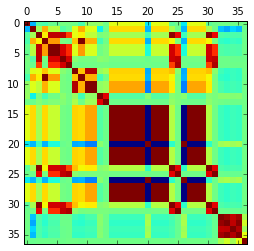

In [438]:
plt.matshow(df_train.corr())

In [688]:
def createCorrelates(data):
    #data['correlation1'] = np.correlate(data['intervalDeviation'], data['intervalSum'], 'same')
    #data['correlation1'] = np.correlate(data['intervalDeviation'], data['intervalAverage'], 'same')
    #data['correlation1'] = np.correlate(data['intervalDeviation'], data['intervalMean'], 'same')
    #data['correlation1'] = np.correlate(data['intervalDeviation'], data['intervalVariance'], 'same')
    #data['correlation1'] = np.correlate(data['intervalDeviation'], data['keyDownTotalDeviation'], 'same')
    #data['correlation1'] = np.correlate(data['intervalDeviation'], data['keyDownTotalVariance'], 'same')
    #data['correlation1'] = np.correlate(data['intervalDeviation'], data['keyUpTotalDeviation'], 'same')
    #data['correlation1'] = np.correlate(data['intervalDeviation'], data['keyUpTotalVariance'], 'same')

    #data['correlation1'] = np.correlate(data['intervalVariance'], data['keyDownTotalVariance'], 'same')
    #data['correlation1'] = np.correlate(data['intervalVariance'], data['keyUpTotalVariance'], 'same')

    #data['correlation1'] = np.correlate(data['pressedAverage'], data['pressedSum'], 'same')
    #data['correlation1'] = np.correlate(data['pressedAverage'], data['pressedMean'], 'same')

    #data['correlation1'] = np.correlate(data['pressedMean'], data['pressedSum'], 'same')

    #data['correlation1'] = np.correlate(data['intervalMedian'], data['pressedMedian'], 'same')

    #data['correlation1'] = np.correlate(data['keyUpTotalSum'], data['keyDownTotalSum'], 'same')
    #data['correlation1'] = np.correlate(data['keyUpTotalSum'], data['keyDownTotalMedian'], 'same')
    #data['correlation1'] = np.correlate(data['keyUpTotalSum'], data['keyDownTotalAverage'], 'same')
    #data['correlation1'] = np.correlate(data['keyUpTotalSum'], data['keyDownTotalMean'], 'same')
    data.fillna(0, inplace=True)
    return data

df_train = createCorrelates(df_train)
df_test =  createCorrelates(df_test)
    
for column in df_train.columns:
    if df_train[column].dtype == np.float64:
        df_train[column] = df_train[column].round(1)
        
for column in df_test.columns:
    if df_test[column].dtype == np.float64:
        df_test[column] = df_test[column].round(1)

if('id' in df_train):
    df_train.drop(['id'], axis=1, inplace=True)
    
if('id' in df_test):
    df_test.drop(['id'], axis=1, inplace=True)

features = df_train.columns.difference(['target'])

X = df_train[features].values
y = df_train['target'].values

df_train.head()

,target,intervalMedian,intervalDeviation,intervalVariance,pressedSum,pressedMedian,pressedAverage,pressedMean,pressedDeviation,pressedVariance,keyDownTotalSum,keyDownTotalMedian,keyDownTotalAverage,keyDownTotalMean,keyUpTotalSum,keyUpTotalMedian,keyUpTotalAverage,keyUpTotalMean
0,1,19.0,3.7,14.1,395,19.0,20.8,20.8,4.6,20.9,6882,361.0,362.2,362.2,7277.0,379.0,383.0,383.0
1,1,851.0,5.1,25.9,13342,851.0,667.1,667.1,4.3,18.8,289236,14468.0,14461.8,14461.8,302578.0,15138.0,15128.9,15128.9
2,1,1005.0,3.9,15.4,11911,1005.0,595.6,595.6,5.5,30.6,304044,15193.5,15202.2,15202.2,315955.0,15793.0,15797.8,15797.8
3,1,231.0,4.1,17.1,14294,231.0,714.7,714.7,4.8,22.8,179316,8968.0,8965.8,8965.8,193610.0,9684.5,9680.5,9680.5
4,1,843.0,4.1,16.6,9874,843.0,493.7,493.7,5.2,27.5,254002,12688.5,12700.1,12700.1,263876.0,13187.0,13193.8,13193.8


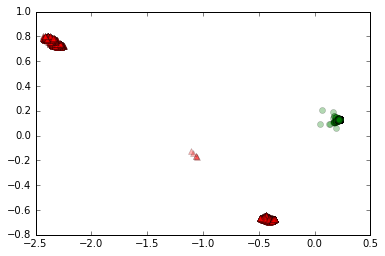

In [689]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import decomposition

from sklearn.preprocessing import MaxAbsScaler
pca_data = MaxAbsScaler().fit_transform(df_train)

# Roda o PCA
pca = decomposition.PCA(n_components=2)
data = pca.fit_transform(pca_data)

data0 = data[df_train[df_train['target'] == 0].index.values]
data1 = data[df_train[df_train['target'] == 1].index.values]

plt.plot(data0[:,0], data0[:,1], 'o', color='g', alpha=0.3)
plt.plot(data1[:,0], data1[:,1], '^', color='r', alpha=0.3)


In [690]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import log_loss
from sklearn.cross_validation import cross_val_score

classifier = RandomForestClassifier(random_state=1000, n_estimators=310, max_depth=8)
#classifier = AdaBoostClassifier(classifier)
#classifier = BaggingClassifier(classifier)
#classifier = ExtraTreesClassifier(random_state=1000, n_estimators=1000, max_depth=20)
scores = cross_val_score(classifier, X, y, scoring='log_loss', cv=10, n_jobs=-1)

# O resultado é um array de scores, um para cada fold. A media é para termos um score geral.
scores, np.std(scores), np.mean(scores)

(array([-0.01483078, -0.00620292, -0.00346996, -0.00558102, -0.00602175,
        -0.0020328 , -0.00807184, -0.06877775, -0.0945916 , -0.01490618]),
 0.030443201020329332,
 -0.022448660376779398)

In [266]:
from sklearn.grid_search import GridSearchCV

param_grid = {
            "criterion": ['entropy', 'gini'],
            "bootstrap": [False, True],
            "n_estimators": [250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
                             260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
                             270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
                             280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
                             290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
                             300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
                             310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
                             320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
                             330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
                             340, 341, 342, 343, 344, 345, 346, 347, 348, 349,
                             350, 351, 352, 353, 354, 355, 356, 357, 358, 359,
                             360, 361, 362, 363, 364, 365, 366, 367, 368, 369,
                             370, 371, 372, 373, 374, 375, 376, 377, 378, 379,
                             380, 381, 382, 383, 384, 385, 386, 387, 388, 389,
                             390, 391, 392, 393, 394, 395, 396, 397, 398, 399,
                             400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
                             410, 411, 412, 413, 414, 415, 416, 417, 418, 419,
                             420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
                             430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
                             440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
                             450, 451, 452, 453, 454, 455, 456, 457, 458, 459,
                             460, 461, 462, 463, 464, 465, 466, 467, 468, 469,
                             470, 471, 472, 473, 474, 475, 476, 477, 478, 479,
                             480, 481, 482, 483, 484, 485, 486, 487, 488, 489,
                             490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500],
            "max_depth": [6, 7, 8, 9, 10],
            #"max_features": ['auto', 0.08, 0.2, 0.3],
            #"min_samples_split": [2, 5, 10],
            #"min_samples_leaf": [1, 3, 5]
}

gs_classifier = GridSearchCV(classifier, param_grid, scoring="log_loss", verbose=3)
gs_classifier.fit(X, y)

# Apos o fit o objeto gs_classifier tera as informacoes do busca de parametros
classifier = gs_classifier.best_estimator_ 

gs_classifier.best_params_, gs_classifier.best_score_

({'bootstrap': True,
  'criterion': 'gini',
  'max_depth': 500,
  'n_estimators': 3000},
 -0.13681676159244946)

In [691]:
classifier.fit(X, y)
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(len(importances)):
    print("   %5s: %f%%" % (features[indices[f]], importances[indices[f]]*100))

Feature ranking:
   pressedVariance: 26.054747%
   pressedDeviation: 22.291563%
   intervalVariance: 11.688930%
   pressedMean: 7.646792%
   intervalDeviation: 6.772614%
   pressedAverage: 5.899576%
   intervalMedian: 3.037111%
   pressedMedian: 2.818211%
   pressedSum: 2.515087%
   keyUpTotalSum: 1.830345%
   keyDownTotalAverage: 1.700975%
   keyUpTotalAverage: 1.682944%
   keyUpTotalMean: 1.545448%
   keyDownTotalMean: 1.483725%
   keyDownTotalMedian: 1.237939%
   keyUpTotalMedian: 1.094237%
   keyDownTotalSum: 0.699755%


In [341]:
classifier.fit(X, y)

y_pred = classifier.predict_proba(df_test[features])[:,1]
submission = pd.read_csv('submission_sample.csv')
submission['target'] = y_pred
submission.to_csv('result.csv', index=False)